In [2]:
import numpy as np

вариант = len('МезенцевГлебВладимирович')%30
вариант

24

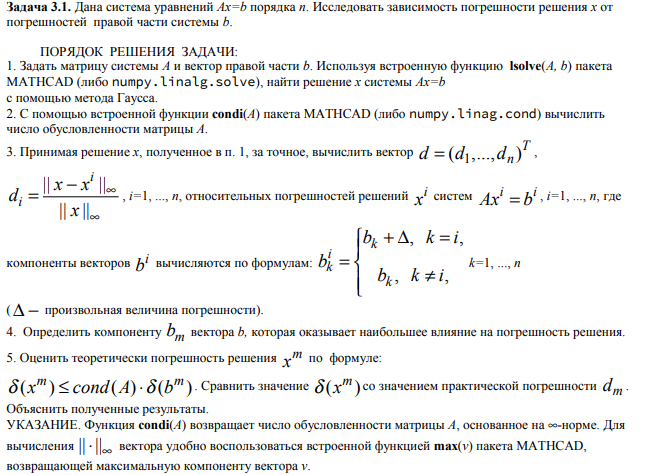
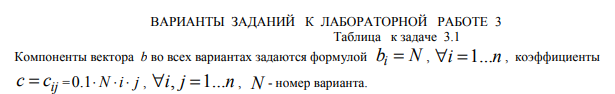
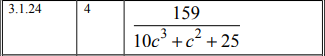

###  Задаём условие

In [3]:
N = вариант
n = 4
c_to_a = np.vectorize(lambda c: 159/(10 * c**3 + c**2 + 25))
c = np.array([[0.1 * N * i * j for j in range(1, n+1)]for i in range(1, n+1)])

b = N*np.ones(n)
A = c_to_a(c)

###  Решаем систему и находим число обусловленности

In [4]:
x = np.linalg.solve(A, b)
cond = np.linalg.cond(A, p = np.inf)

###  Исследуем зависимость погрешность решения от погрешности правой части

In [5]:
delta = 1e-14
Bi = np.array([b]*n) + delta * (np.eye(n,n))

def di(bi, x):
    xi = np.linalg.solve(A, bi)
    return np.linalg.norm(x - xi, ord = np.inf) / np.linalg.norm(x, ord = np.inf)

Di = np.apply_along_axis(di, 0, Bi, x)
max_d_ind = np.argmax(Di)

d_th = cond * np.linalg.norm(Bi[max_d_ind]- b, ord = np.inf)

[print('d_'+str(i)+' = '+str(Di[i])) for i in range(n)];
print('\nd_max pract = '+str(Di[max_d_ind]))
print('d_max theor = '+str(d_th))

d_0 = 0.0
d_1 = 0.0
d_2 = 1.5678991406383747e-15
d_3 = 1.5678991406383747e-15

d_max pract = 1.5678991406383747e-15
d_max theor = 1.0873573522395077e-06


###  Разница в теоричиском и практическом значении оказалась колоссальной. Но теоритическая оценка является оценкой сверху, поэтому никаких противоречий нет.

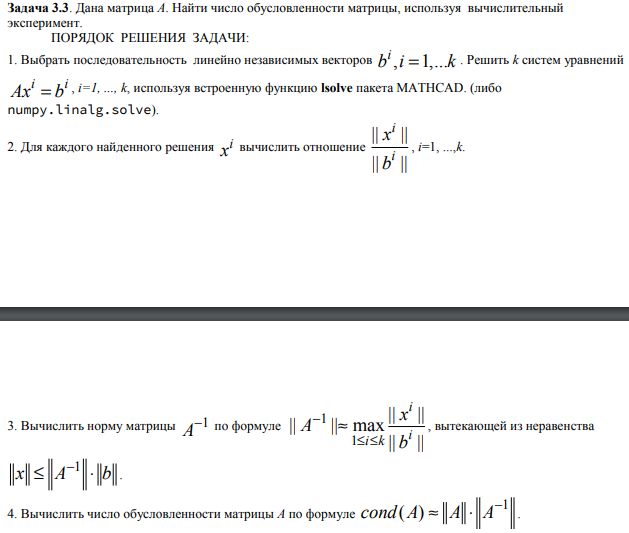
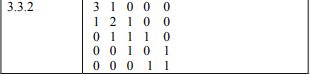

###  Задаём условие

In [6]:
A = np.array([[3,1,0,0,0],
              [1,2,1,0,0],
              [0,1,1,1,0],
              [0,0,1,0,1],
              [0,0,0,1,1]])

###  В качестве независимых векторов выбираем единичные, решаем 5 систем и находим отношения норм решений к нормам правых частей

In [7]:
Bi = np.eye(5)
Xi = np.array([np.linalg.solve(A, b) for b in Bi])
ratios = [np.linalg.norm(Xi[i], ord=np.inf)/np.linalg.norm(Bi[i], ord=np.inf) for i in range(Bi.shape[0])]

###  Находим оценку для нормы обратной матрицы

In [8]:
inverse_matrix_norm = np.max(ratios)

###  Находим число обусловенности матрицы A,  полученное с помощью вычислительного эксперимента

In [9]:
cond_exp = np.linalg.norm(A, ord = np.inf)*inverse_matrix_norm
cond_exp

3.4285714285714284

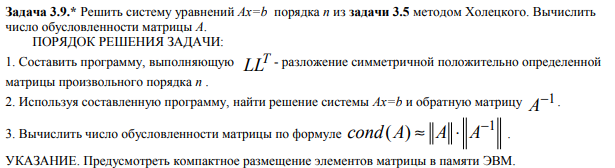
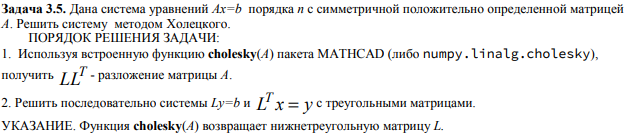
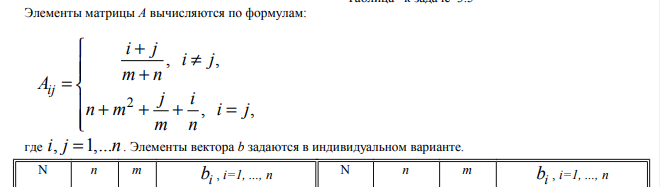



###  Реализуем метод декомпозиции Холецкого

In [10]:
def cholesky(A):
    L = np.zeros(A.shape)
    for i in range(A.shape[0]):
        for j in range(i+1):
            if i != j:
                L[i,j] = 1 / L[j,j] * (A[i,j]-np.dot(L[i],L[j]))
            else:
                L[i,i] = np.sqrt(A[i,i] - np.dot(L[i],L[i]))
    return L            

###  Проведём несколько тестов, сверив результаты работы с результатами метода, реализованного в модуле np.linalg

In [11]:
A1 = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])
B1 = np.linalg.cholesky(A1)
C1 = cholesky(A1)
assert np.array_equal(B1,C1)

In [12]:
A2 = np.array([[6,3,0],[1,9,1],[3,1,2]])
B2 = np.linalg.cholesky(A2)
C2 = cholesky(A2)
assert np.array_equal(B2,C2)

In [13]:
A3 = np.array([[1,0],[0,1]])
B3 = np.linalg.cholesky(A3)
C3 = cholesky(A3)
assert np.array_equal(B3,C3)

In [14]:
A4 = np.array([[1,2,5],[1,4,6],[0,3,4]])
B4 = np.linalg.cholesky(A4)
C4 = cholesky(A4)
assert np.array_equal(B4,C4)

###  Все тесты прошли успешно

###  Зададим условие

In [15]:
N = вариант
n = 30
m = 20

b = np.array([m * i + n for i in range(n)])
A = np.array([
    [(i+j)/(m+n) if i!=j else (n+m**2+j/m+i/n)
                             for j in range(n)]
                                for i in range(n)])

###  Решим систему методом Холецкого и найдём число обусловленности матрицы A

In [16]:
L = cholesky(A)
y = np.linalg.solve(L, b)
x = np.linalg.solve(L.T,y)
A_inv = np.dot(np.linalg.inv(L.T),np.linalg.inv(L))

cond = np.linalg.norm(A, ord = np.inf)*np.linalg.norm(A_inv, ord = np.inf)
cond

1.1167057395667688